In [110]:
%matplotlib inline

In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [113]:
import seaborn as sns

In [114]:
df_thai = pd.read_csv('/Users/jralston/git_proj/Scrapy_project_yelp/yelp/yelp_thai.csv')

In [115]:
df_thai.shape

(98358, 6)

In [94]:
df = df_thai

In [95]:
df.head()

,address,date,price,rating,restaurant,text
0,"265 W 23rd St, New York, NY 10011",12/5/2010,$$,3,Rin Thai,"Great food, friendly but no so attentive servi..."
1,"265 W 23rd St, New York, NY 10011",2/24/2009,$$,4,Rin Thai,While Chelsea has no shortage of Thai restaura...
2,"265 W 23rd St, New York, NY 10011",1/25/2010,$$,4,Rin Thai,Finally a Thai restaurant that deliverys on sp...
3,"1114 6th Ave, New York, NY 10036",10/25/2017,$$,1,sweetgreen,I would give this place 0 stars if i could. I ...
4,"1114 6th Ave, New York, NY 10036",11/14/2017,$$,4,sweetgreen,"Amazing salad, had the chicken & brussels fall..."


In [96]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['rating'], dtype='object'),
 dtype('O'): Index(['address', 'date', 'price', 'restaurant', 'text'], dtype='object')}

In [97]:
df.dropna(axis=0, how='any').shape

(98303, 6)

In [98]:
df = df.dropna(axis=0, how='any')

In [99]:
df['price'] = df['price'].apply(lambda x: len(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [102]:
df.head()

,address,date,price,rating,restaurant,text
0,"265 W 23rd St, New York, NY 10011",12/5/2010,2,3,Rin Thai,"Great food, friendly but no so attentive servi..."
1,"265 W 23rd St, New York, NY 10011",2/24/2009,2,4,Rin Thai,While Chelsea has no shortage of Thai restaura...
2,"265 W 23rd St, New York, NY 10011",1/25/2010,2,4,Rin Thai,Finally a Thai restaurant that deliverys on sp...
3,"1114 6th Ave, New York, NY 10036",10/25/2017,2,1,sweetgreen,I would give this place 0 stars if i could. I ...
4,"1114 6th Ave, New York, NY 10036",11/14/2017,2,4,sweetgreen,"Amazing salad, had the chicken & brussels fall..."


In [85]:
df.groupby(['restaurant', 'address']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False).head()

text    rating  \
                                                         count      mean   
restaurant          address                                                
Morimoto            88 10th Ave, New York, NY 10011       2739  4.060241   
TAO Uptown          42 E 58th St, New York, NY 10022      2145  3.489977   
Pure Thai Cookhouse 766 9th Ave, New York, NY 10019       2144  4.104944   
BaoHaus             238 E 14th St, New York, NY 10003     1756  3.623576   
Jean-Georges        1 Central Park W, New York, NY 10023  1675  4.282388   

                                                                    
                                                               std  
restaurant          address                                         
Morimoto            88 10th Ave, New York, NY 10011       1.066294  
TAO Uptown          42 E 58th St, New York, NY 10022      1.212119  
Pure Thai Cookhouse 766 9th Ave, New York, NY 10019       1.013071  
BaoHaus             238 E 14th St, New York, NY 10003     1.094452  
Jean-Georges        1 Central Park W, New York, NY 10023  1.041960

In [9]:
df_agg = df.groupby(['restaurant', 'address', 'price']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False)

In [27]:
df.price.head()

0    $$
1    $$
2    $$
3    $$
4    $$
Name: price, dtype: object

Text(0,0.5,'rating')

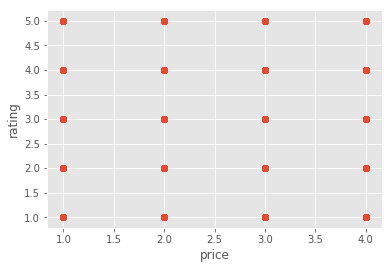

In [105]:
plt.scatter(df['price'], df['rating'])
plt.xlabel('price')
plt.ylabel('rating')

In [11]:
df_agg.head()

text  \
                                                               count   
restaurant          address                              price         
Morimoto            88 10th Ave, New York, NY 10011      $$$$   2739   
TAO Uptown          42 E 58th St, New York, NY 10022     $$$    2145   
Pure Thai Cookhouse 766 9th Ave, New York, NY 10019      $$     2144   
BaoHaus             238 E 14th St, New York, NY 10003    $      1756   
Jean-Georges        1 Central Park W, New York, NY 10023 $$$$   1675   

                                                                  rating  \
                                                                    mean   
restaurant          address                              price             
Morimoto            88 10th Ave, New York, NY 10011      $$$$   4.060241   
TAO Uptown          42 E 58th St, New York, NY 10022     $$$    3.489977   
Pure Thai Cookhouse 766 9th Ave, New York, NY 10019      $$     4.104944   
BaoHaus             238 E 14th St, New York, NY 10003    $      3.623576   
Jean-Georges        1 Central Park W, New York, NY 10023 $$$$   4.282388   

                                                                          
                                                                     std  
restaurant          address                              price            
Morimoto            88 10th Ave, New York, NY 10011      $$$$   1.066294  
TAO Uptown          42 E 58th St, New York, NY 10022     $$$    1.212119  
Pure Thai Cookhouse 766 9th Ave, New York, NY 10019      $$     1.013071  
BaoHaus             238 E 14th St, New York, NY 10003    $      1.094452  
Jean-Georges        1 Central Park W, New York, NY 10023 $$$$   1.041960

In [75]:
df.loc[df.price=='$$$$',:]

,address,date,price,rating,restaurant,text
4191,"New York, NY 10014",3/31/2016,$$$$,1,Sakara Life,"Disappointing customer service, increasingly t..."
4192,"New York, NY 10014",5/30/2015,$$$$,2,Sakara Life,"I'll start by saying I really, really wanted t..."
4193,"New York, NY 10014",9/6/2015,$$$$,5,Sakara Life,sakara taught this woman-child how to eat. Yes...
4194,"New York, NY 10014",7/8/2015,$$$$,5,Sakara Life,Is it easy? No. Is it expensive? Hell yes. You...
4195,"New York, NY 10014",10/4/2016,$$$$,3,Sakara Life,The food is delicious and arrives promptly wit...
4196,"New York, NY 10014",6/8/2016,$$$$,2,Sakara Life,"I really want to give them 5 stars, but after ..."
4197,"New York, NY 10014",12/27/2016,$$$$,1,Sakara Life,If it was possible to give negative stars to t...
4198,"New York, NY 10014",4/27/2016,$$$$,1,Sakara Life,Not sure if the founders understand about nutr...
4199,"New York, NY 10014",6/11/2015,$$$$,5,Sakara Life,Sakara is delivered on time to my door in Asto...
4200,"New York, NY 10014",9/16/2015,$$$$,5,Sakara Life,this service is absolutely incredible. Everyth...


In [22]:
df.loc[df.price=='$$$$',:].groupby(['restaurant', 'address']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False)

text    rating  \
                                                           count      mean   
restaurant            address                                                
Morimoto              88 10th Ave, New York, NY 10011       2739  4.060241   
Jean-Georges          1 Central Park W, New York, NY 10023  1675  4.282388   
Hakkasan              311 W 43rd St, New York, NY 10036      736  3.737772   
Sushi of Gari 46      347 W 46th St, New York, NY 10036      594  3.863636   
15 East Restaurant    15 E 15th St, New York, NY 10003       582  3.975945   
Neta                  61 W 8th St, New York, NY 10011        325  3.929231   
O Ya                  120 E 28th St, New York, NY 10016      183  4.387978   
Sakara Life           New York, NY 10014                      64  3.140625   
Mr. Jones Supper Club 22 Jones St, New York, NY 10014         43  5.000000   

                                                                      
                                                                 std  
restaurant            address                                         
Morimoto              88 10th Ave, New York, NY 10011       1.066294  
Jean-Georges          1 Central Park W, New York, NY 10023  1.041960  
Hakkasan              311 W 43rd St, New York, NY 10036     1.218000  
Sushi of Gari 46      347 W 46th St, New York, NY 10036     1.264347  
15 East Restaurant    15 E 15th St, New York, NY 10003      1.128311  
Neta                  61 W 8th St, New York, NY 10011       1.223954  
O Ya                  120 E 28th St, New York, NY 10016     1.052087  
Sakara Life           New York, NY 10014                    1.602252  
Mr. Jones Supper Club 22 Jones St, New York, NY 10014       0.000000

In [33]:
df.head()

,address,date,price,rating,restaurant,text
0,"265 W 23rd St, New York, NY 10011",12/5/2010,$$,3,Rin Thai,"Great food, friendly but no so attentive servi..."
1,"265 W 23rd St, New York, NY 10011",2/24/2009,$$,4,Rin Thai,While Chelsea has no shortage of Thai restaura...
2,"265 W 23rd St, New York, NY 10011",1/25/2010,$$,4,Rin Thai,Finally a Thai restaurant that deliverys on sp...
3,"1114 6th Ave, New York, NY 10036",10/25/2017,$$,1,sweetgreen,I would give this place 0 stars if i could. I ...
4,"1114 6th Ave, New York, NY 10036",11/14/2017,$$,4,sweetgreen,"Amazing salad, had the chicken & brussels fall..."


(array([ 9390.,  8861., 16196., 31845., 32011.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

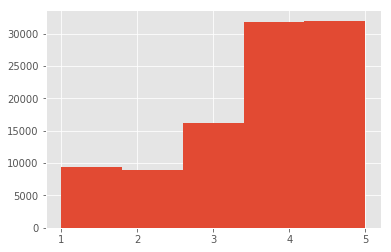

In [103]:
plt.hist(df[['rating']], bins = 5)

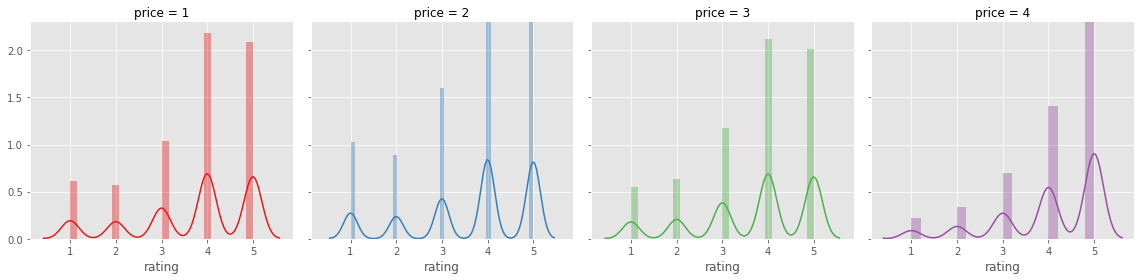

In [108]:
SexGrid = sns.FacetGrid(df[['price','rating']], col='price', hue="price", palette="Set1", size=4)
SexGrid.map(sns.distplot, "rating")

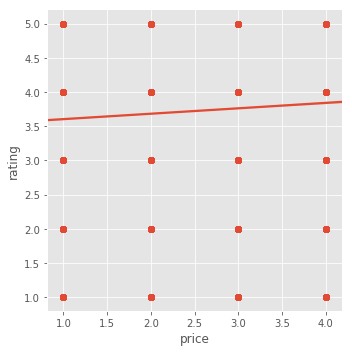

In [109]:
sns.lmplot("price", "rating", df)